In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load the Wine Quality Dataset
# Assuming the dataset is downloaded as "winequality-red.csv" or "winequality-white.csv"
# For example, load red wine data:
url = '/content/winequality-red.csv'

df1 = pd.read_csv('/content/winequality-red.csv', delimiter=';')
df2 = pd.read_csv('/content/winequality-white.csv', delimiter=';')

df1['type'] = 'red'
df2['type'] = 'white'

df = pd.concat([df1, df2], axis=0)

In [ ]:
# Step 3: Preprocess the data
# We need to standardize the data because Factor Analysis is sensitive to scale

# Separate features and target (if you want to use 'quality' as a target, you could separate it)
X = df.drop(columns=['quality', 'type'])  # Features (dropping target column)
y = df['quality']  # Target (optional, if you want to predict wine quality)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

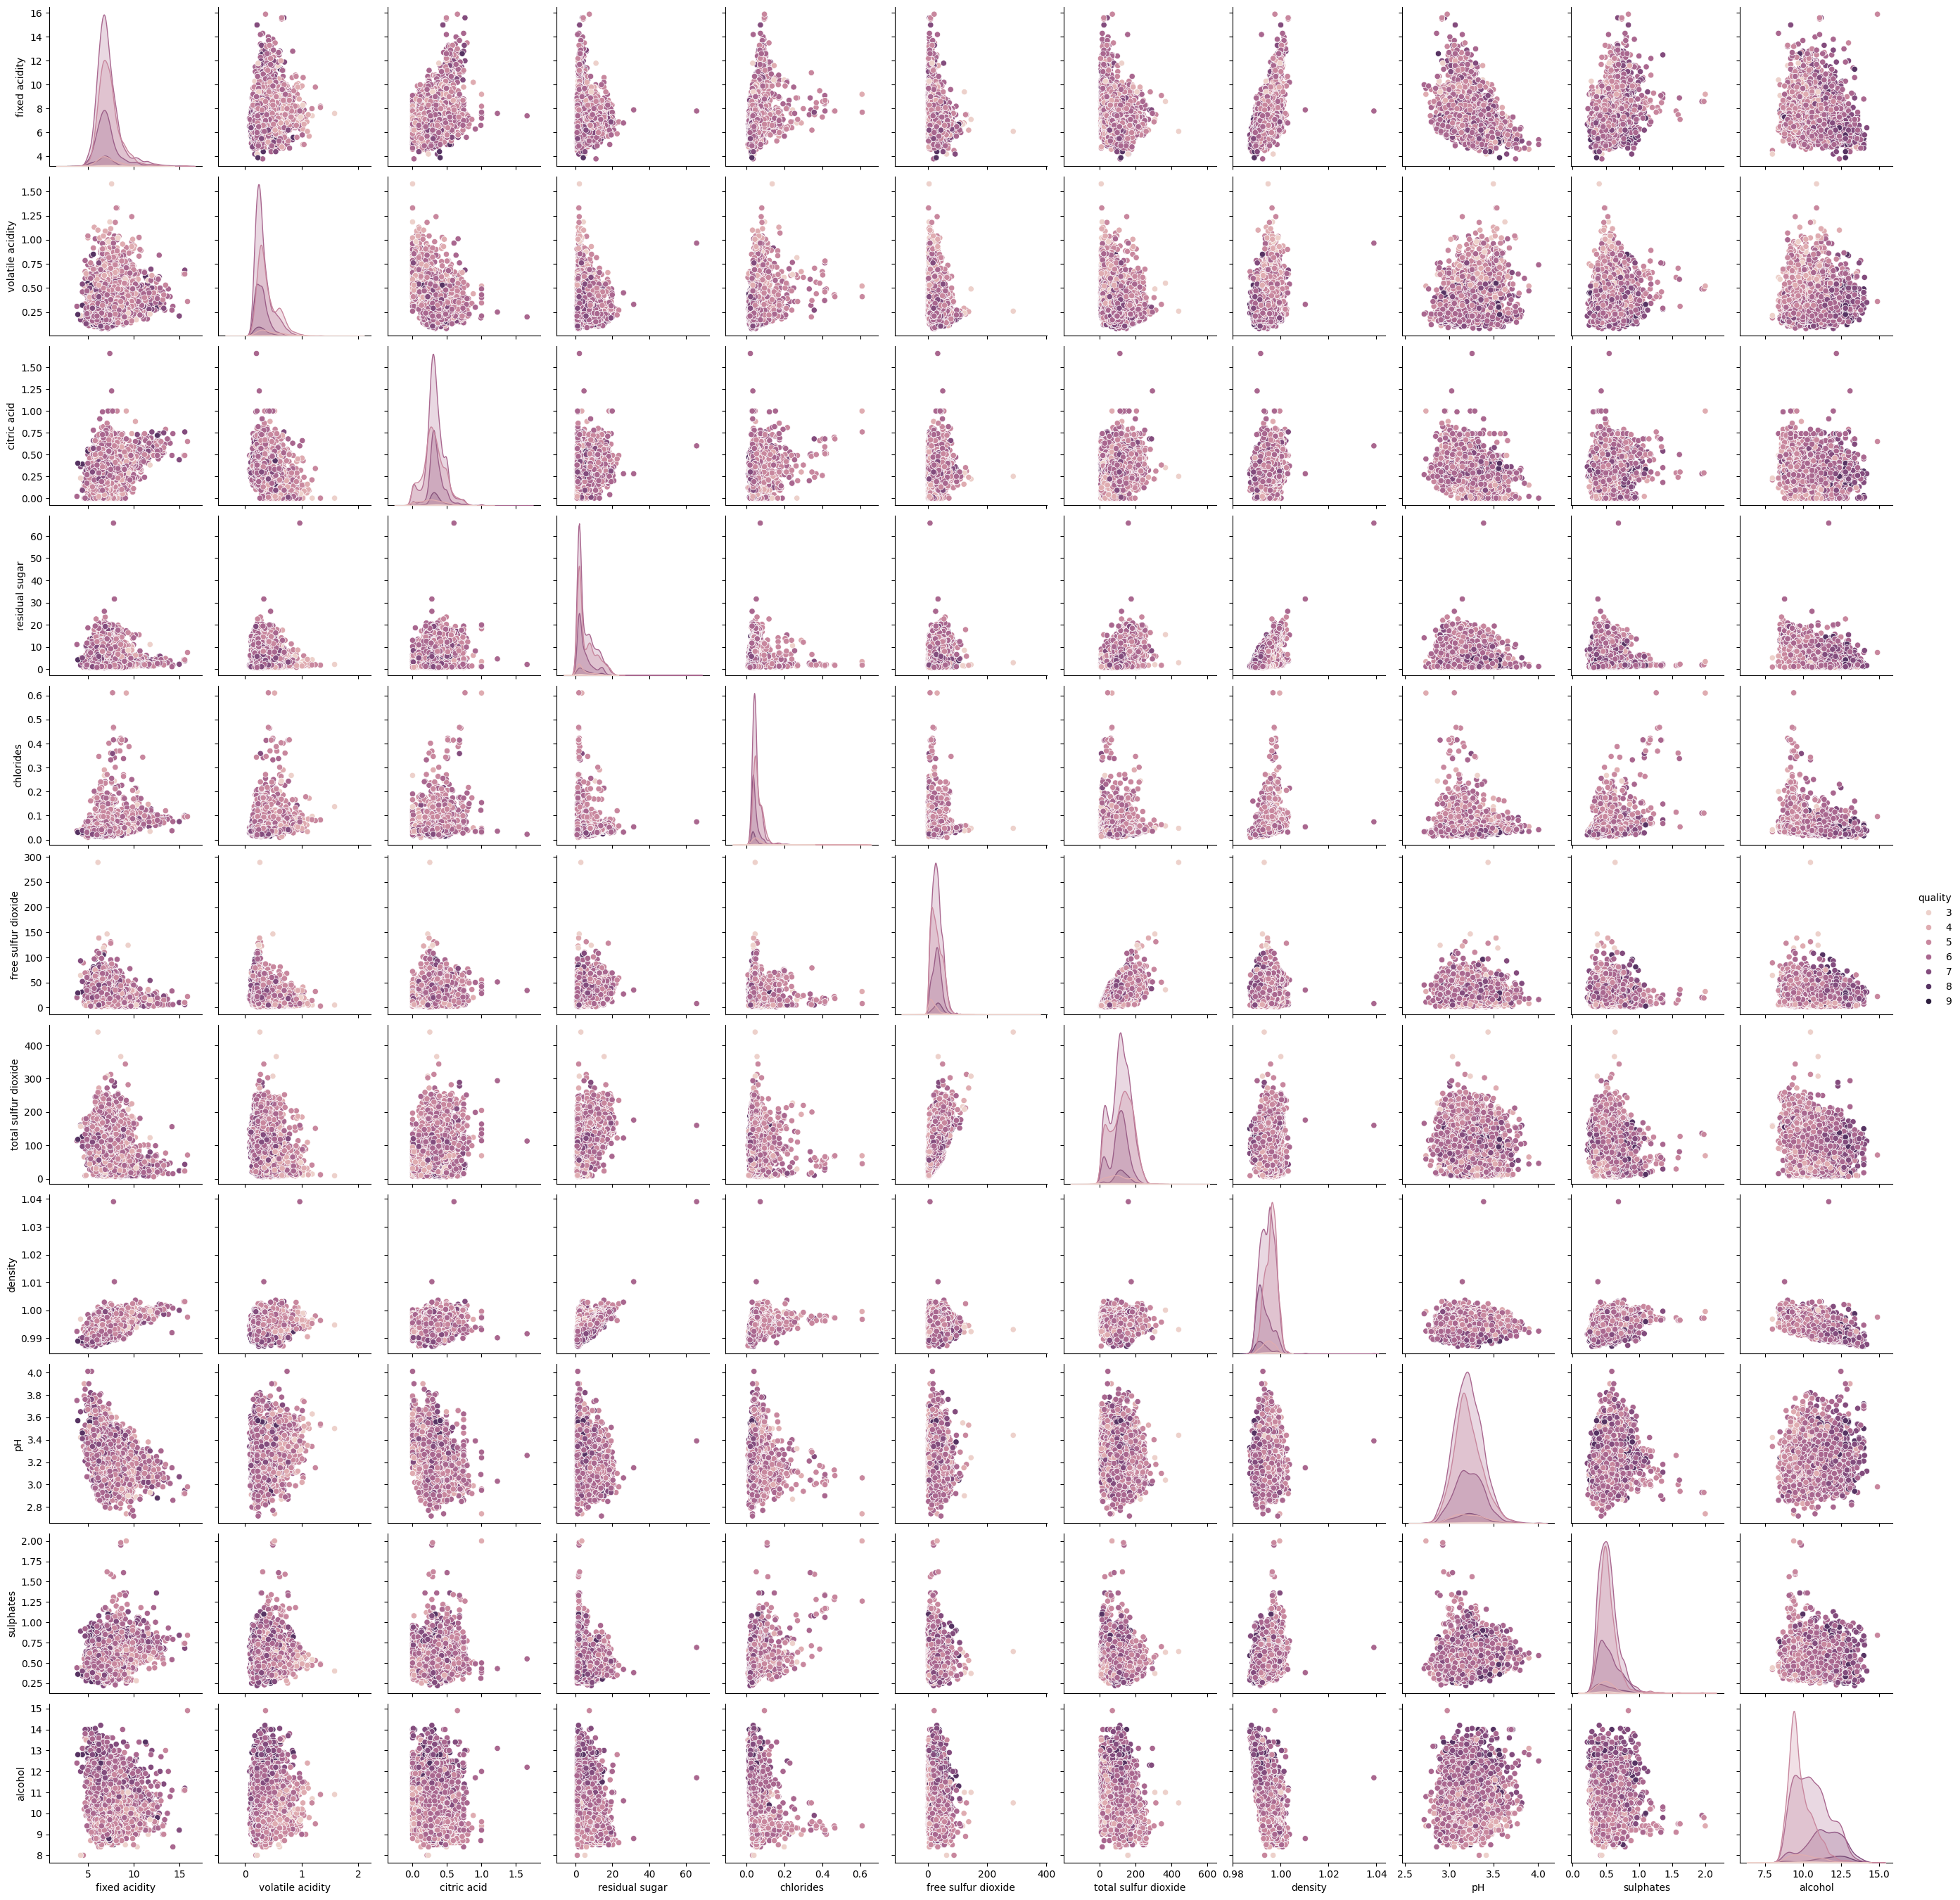

In [ ]:
import seaborn as sns

# Assuming 'X' is your DataFrame of features before scaling
sns.pairplot(df, hue='quality', vars=X.columns)
plt.show()

In [ ]:
# Step 4: Apply Factor Analysis to reduce dimensionality to 2 components
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

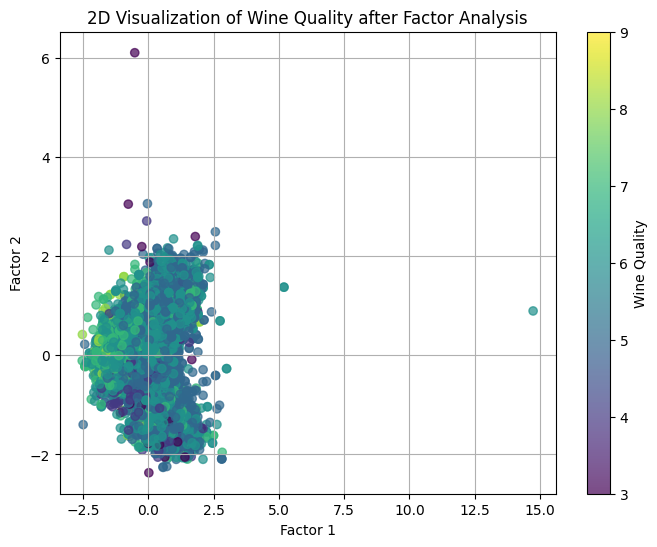

In [ ]:
# Step 5: Visualize the Reduced Data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Wine Quality')
plt.title('2D Visualization of Wine Quality after Factor Analysis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Interpret the Results
# print("Explained Variance Ratio by Factors:")
# print(fa.explained_variance_ratio_)

print("Noise Variance by Factors:")
print(fa.noise_variance_)

Noise Variance by Factors:
[0.63482834 0.66825612 0.95402879 0.3698176  0.73717184 0.42243725
 0.20999583 0.00113108 0.92373853 0.7991323  0.47474865]
